In [441]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import log_loss
import math
import matplotlib.pyplot as plt
%matplotlib inline 
from datetime import datetime


In [442]:
data = pd.read_csv('data4.csv')
data.shape

(4824, 14)

In [443]:
dup=data[data.duplicated()]

In [150]:
dup.index

Int64Index([ 656,  696,  715,  717,  778,  786,  826,  835,  865,  874,
            ...
            4385, 4395, 4401, 4403, 4409, 4463, 4473, 4587, 4593, 4617],
           dtype='int64', length=112)

In [151]:
data_scraped = pd.read_csv('data_scraped4.csv')
print(data_scraped.shape)
dup_scraped = data_scraped[data_scraped.duplicated()]
dup_scraped.index

(4824, 11)


Int64Index([ 656,  696,  715,  717,  778,  786,  826,  835,  865,  874,
            ...
            4385, 4395, 4401, 4403, 4409, 4463, 4473, 4587, 4593, 4617],
           dtype='int64', length=112)

In [152]:
sum((dup.index == dup_scraped.index) == True)

112

In [153]:
data = data.drop_duplicates()
data_scraped = data_scraped.drop_duplicates()

In [154]:
data.describe()

,title_words,days_passed,ct_image,ct_tags,ct_words,title_emot_quotient,read_time,following,followedBy,claps,img/word
count,4712.000000,4712.000000,4712.000000,4712.000000,4712.000000,4712.000000,4712.000000,4712.000000,4.712000e+03,4712.000000,4712.000000
mean,6.806452,136.413625,5.128183,4.570883,1183.176783,0.045998,6.329372,555.343803,1.535680e+04,1007.031197,0.006800
std,2.342717,113.543769,5.979456,0.883386,821.745217,0.244059,3.733730,2973.598738,2.003436e+05,3708.077668,0.015127
min,1.000000,3.000000,1.000000,1.000000,13.000000,-0.848100,2.000000,0.000000,1.000000e+00,1.000000,0.000127
25%,5.000000,42.000000,1.000000,5.000000,660.000000,0.000000,4.000000,23.000000,1.550000e+02,74.000000,0.001799
50%,7.000000,96.000000,3.000000,5.000000,1027.500000,0.000000,5.000000,104.000000,7.845000e+02,223.000000,0.003650
75%,8.000000,227.000000,7.000000,5.000000,1487.250000,0.000000,7.000000,310.500000,4.208000e+03,706.250000,0.007143
max,17.000000,1378.000000,120.000000,5.000000,7896.000000,0.874000,67.000000,97292.000000,1.345220e+07,166000.000000,0.689655


In [155]:
data.shape, data_scraped.shape

((4712, 14), (4712, 11))

In [156]:
data.columns, data_scraped.columns


(Index(['title_words', 'days_passed', 'ct_image', 'ct_tags', 'text', 'ct_words',
        'title_emot_quotient', 'featured_in_tds', 'read_time', 'links',
        'following', 'followedBy', 'claps', 'img/word'],
       dtype='object'),
 Index(['title', 'claps', 'datePublished', 'read_time', 'followedBy',
        'following', 'para', 'tags', 'bullets', 'images', 'links'],
       dtype='object'))

In [157]:
data_scraped.drop(['claps', 'read_time', 'followedBy', 'following', 'links'],axis = 1, inplace = True)

In [158]:
data_scraped.head()

,title,datePublished,para,tags,bullets,images
0,Python is the Perfect Tool for any Problem,2018-02-04,"[Reflecting on my first Python program, Reflec...","[Python, Programming, Education, Data Science,...",[The best way to learn a new skill is to find ...,"[<img class=""graf-image"" data-action=""zoom"" da..."
1,Computer Science VS Software Engineering — Which,2018-02-06,"[Hey everyone! My name is YK, and I’m currentl...","[Programming, Tech, Careers, Startup, Self Imp...",[Computer Science is the study of how computer...,"[<img class=""graf-image"" data-action=""zoom"" da..."
2,It’s a no-brainer! Deep learn,2018-02-05,"[Written by Atli Kosson and Henrik Marklund, F...","[Machine Learning, Deep Learning, Healthcare, ...","[The segmentation problem, The data from MR sc...","[<img class=""graf-image"" data-action=""zoom"" da..."
3,The 5 Clustering Algorithms Data,2018-02-05,[Clustering is a Machine Learning technique th...,"[Machine Learning, Clustering, Data Science, A...","[To begin, we first select a number of classes...","[<img class=""graf-image"" data-height=""480"" dat..."
4,Building Prediction APIs in Python (Part 2,2018-02-04,"[In the initial series post, we created a simp...","[Machine Learning, Python, API, Scikit Learn]",[Online Advertising: Suppose we’ve built a mod...,"[<img class=""graf-image"" data-height=""426"" dat..."


In [159]:
data = pd.concat([data, data_scraped], axis = 1)
data.head()

,title_words,days_passed,ct_image,ct_tags,text,ct_words,title_emot_quotient,featured_in_tds,read_time,links,following,followedBy,claps,img/word,title,datePublished,para,tags,bullets,images
0,8.0,7.0,2.0,5.0,"[Reflecting on my first Python program, Reflec...",660.0,0.25,True,3.0,"[https://automatetheboringstuff.com/, https://...",84.0,1497.0,6400.0,0.003030,Python is the Perfect Tool for any Problem,2018-02-04,"[Reflecting on my first Python program, Reflec...","[Python, Programming, Education, Data Science,...",[The best way to learn a new skill is to find ...,"[<img class=""graf-image"" data-action=""zoom"" da..."
1,7.0,5.0,1.0,5.0,"[Hey everyone! My name is YK, and I’m currentl...",1517.0,0.00,False,7.0,"[https://www.youtube.com/csdojo, https://mediu...",62.0,1651.0,2100.0,0.000659,Computer Science VS Software Engineering — Which,2018-02-06,"[Hey everyone! My name is YK, and I’m currentl...","[Programming, Tech, Careers, Startup, Self Imp...",[Computer Science is the study of how computer...,"[<img class=""graf-image"" data-action=""zoom"" da..."
2,5.0,6.0,16.0,5.0,"[Written by Atli Kosson and Henrik Marklund, F...",2678.0,0.00,False,12.0,"[http://cs231n.stanford.edu/, https://arxiv.or...",139.0,180.0,4000.0,0.005975,It’s a no-brainer! Deep learn,2018-02-05,"[Written by Atli Kosson and Henrik Marklund, F...","[Machine Learning, Deep Learning, Healthcare, ...","[The segmentation problem, The data from MR sc...","[<img class=""graf-image"" data-action=""zoom"" da..."
3,6.0,6.0,8.0,5.0,[Clustering is a Machine Learning technique th...,2492.0,0.00,True,11.0,[],19.0,372.0,1800.0,0.003210,The 5 Clustering Algorithms Data,2018-02-05,[Clustering is a Machine Learning technique th...,"[Machine Learning, Clustering, Data Science, A...","[To begin, we first select a number of classes...","[<img class=""graf-image"" data-height=""480"" dat..."
4,7.0,7.0,1.0,4.0,"[In the initial series post, we created a simp...",2367.0,0.00,False,10.0,[https://medium.com/@chris.moradi/building-pre...,6.0,41.0,57.0,0.000422,Building Prediction APIs in Python (Part 2,2018-02-04,"[In the initial series post, we created a simp...","[Machine Learning, Python, API, Scikit Learn]",[Online Advertising: Suppose we’ve built a mod...,"[<img class=""graf-image"" data-height=""426"" dat..."


In [160]:
data.isnull().sum()

title_words            0
days_passed            0
ct_image               0
ct_tags                0
text                   0
ct_words               0
title_emot_quotient    0
featured_in_tds        0
read_time              0
links                  0
following              0
followedBy             0
claps                  0
img/word               0
title                  0
datePublished          0
para                   0
tags                   0
bullets                0
images                 0
dtype: int64

Bucket by proportion

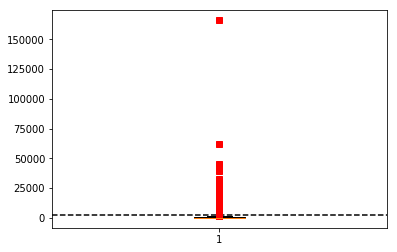

In [161]:
claps = pd.Series(data['claps'])
plt.boxplot(claps,0,'rs')
plt.hlines(y = claps.quantile(0.90), label = '99.5 percentile', xmin = 0,xmax = 100, linestyles='dashed' )


In [162]:
quant_995 = claps.quantile([0.90])
print(quant_995)
data = data[data["claps"] < int(quant_995)]
data.shape

0.9    2100.0
Name: claps, dtype: float64


(4239, 20)

In [163]:
claps=pd.Series(data['claps'])
n_buckets = 20
buckets, bins = pd.qcut(claps, n_buckets, labels=False, retbins=True, precision=4) 
bins = pd.Series(bins).apply(lambda x: format(x, 'f'))
bin_data = pd.DataFrame([(buckets.sort_values(ascending=True)).unique(), bins[0:len(bins)-1], bins[1:len(bins)]]).transpose()
bin_data.columns = ['bucket', 'start', 'end']
bin_data.head()

,bucket,start,end
0,0,1.000000,11.000000
1,1,11.000000,22.000000
2,2,22.000000,34.000000
3,3,34.000000,51.000000
4,4,51.000000,66.000000


In [164]:
data['new_claps'] = buckets
#data['new_claps'] = data.claps.rank(method='dense').astype(int)
data.head()

,title_words,days_passed,ct_image,ct_tags,text,ct_words,title_emot_quotient,featured_in_tds,read_time,links,...,followedBy,claps,img/word,title,datePublished,para,tags,bullets,images,new_claps
3,6.0,6.0,8.0,5.0,[Clustering is a Machine Learning technique th...,2492.0,0.0,True,11.0,[],...,372.0,1800.0,0.003210,The 5 Clustering Algorithms Data,2018-02-05,[Clustering is a Machine Learning technique th...,"[Machine Learning, Clustering, Data Science, A...","[To begin, we first select a number of classes...","[<img class=""graf-image"" data-height=""480"" dat...",19
4,7.0,7.0,1.0,4.0,"[In the initial series post, we created a simp...",2367.0,0.0,False,10.0,[https://medium.com/@chris.moradi/building-pre...,...,41.0,57.0,0.000422,Building Prediction APIs in Python (Part 2,2018-02-04,"[In the initial series post, we created a simp...","[Machine Learning, Python, API, Scikit Learn]",[Online Advertising: Suppose we’ve built a mod...,"[<img class=""graf-image"" data-height=""426"" dat...",4
5,8.0,4.0,21.0,5.0,[Data Science. It’s been touted as the sexiest...,3207.0,0.0,False,16.0,[https://hbr.org/2012/10/data-scientist-the-se...,...,830.0,450.0,0.006548,How to Use Data Science to Understand Wha,2018-02-07,[Data Science. It’s been touted as the sexiest...,"[Data Science, Machine Learning, Programming, ...",[Get lot insights from the data that could oth...,"[<img class=""graf-image"" data-action=""zoom"" da...",14
6,7.0,4.0,20.0,5.0,[Machine Learning (ML) is a sub-field of artif...,3985.0,0.0,False,19.0,[https://medium.com/machine-learning-for-human...,...,830.0,751.0,0.005019,How to Use Machine Learning to Predi,2018-02-07,[Machine Learning (ML) is a sub-field of artif...,"[Machine Learning, Data Science, Programming, ...","[Data Science produces insights, Machine Learn...","[<img class=""graf-image"" data-action=""zoom"" da...",16
7,9.0,11.0,2.0,4.0,"[Ok, so you’ve trained a model, but now what? ...",1241.0,0.0,False,6.0,"[https://www.anaconda.com/download/, http://sc...",...,41.0,284.0,0.001612,Building Prediction APIs in Python (Part 1): S...,2018-01-31,"[Ok, so you’ve trained a model, but now what? ...","[Machine Learning, Python, API, Scikit Learn]","[Security: when you load a pickled object, you...","[<img class=""graf-image"" data-action=""zoom"" da...",12


In [165]:
# y = data['new_claps']
# X = data.drop(['claps', 'new_claps', 'text', 'links', 'para', 'title', 'datePublished', 'tags', 'bullets', 'images'], axis = 1)

# X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.20, random_state=10)

# X_train.shape, X_val.shape

# X_train.head()

# rf = RandomForestClassifier()

# rf.fit(X_train, y_train)

# val_pred_prob = rf.predict_proba(X_val)
# #log_loss(y_val, val_pred)
# val_pred_prob

# log_loss(y_val, val_pred_prob, labels=rf.classes_)

# rf = RandomForestClassifier(min_samples_leaf=10, max_features='auto', n_estimators=50, random_state=10)

# rf.fit(X_train, y_train, )
# val_pred_probs = rf.predict_proba(X_val)

# val_pred = rf.predict(X_val)

# log_loss(y_val, val_pred_probs, labels=rf.classes_)

# val_pred[0:10]

# act_pred = pd.concat([pd.Series(list(y_val)), pd.Series(val_pred)], axis = 1)
# act_pred.columns = ['actual_bin', 'predicted_bin']

# old_range = pd.DataFrame(bin_data.loc[np.array(act_pred.actual_bin),['start', 'end']])
# old_range.reset_index(drop=True, inplace = True)
# # old_range.head()
# new_range = pd.DataFrame(bin_data.loc[np.array(act_pred.predicted_bin),['start', 'end']])
# new_range.reset_index(drop=True, inplace = True)
# new_range.head()

# final_pred = pd.DataFrame(pd.concat([old_range, new_range], axis = 1))

# final_pred = final_pred.set_index(X_val.index.values)
# final_pred.head()

# plt.scatter(y_val, val_pred, c=np.subtract(y_val, val_pred), cmap=plt.cm.Blues)
# plt.ylabel('Predicted Claps')
# plt.xlabel('Actual Claps')
# plt.show()

# plt.hist(abs(np.subtract(y_val, val_pred)))

# plt.show()

# fi = pd.DataFrame(rf.feature_importances_, X_train.columns)
# fi.sort_values(by = 0, ascending=False)

## Adding more features

### Text sentiment

In [166]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords

sid = SentimentIntensityAnalyzer()

In [167]:
data['text_sentiment'] = data['text'].apply(lambda x: sid.polarity_scores(x)['compound'])

In [168]:
data.isnull().sum()

title_words            0
days_passed            0
ct_image               0
ct_tags                0
text                   0
ct_words               0
title_emot_quotient    0
featured_in_tds        0
read_time              0
links                  0
following              0
followedBy             0
claps                  0
img/word               0
title                  0
datePublished          0
para                   0
tags                   0
bullets                0
images                 0
new_claps              0
text_sentiment         0
dtype: int64

In [169]:
# non_stopwords = data['text'].apply(lambda x: [word for word in x.lower().split(' ') if word not in stopwords.words('english')])

In [170]:
data['keyword_proportion'] = data['text'].apply(lambda x: len(np.unique([word for word in x.lower().split(' ') if word not in stopwords.words('english')]))/len(x.split()))

In [525]:
# data.head()

### Day of week

In [172]:
from datetime import datetime

In [173]:
# data_scraped = pd.read_csv('data_scraped 2.csv')
# data_scraped

In [174]:
data['datePublished'] = data['datePublished'].apply(lambda x:datetime.strptime(x,'%Y-%m-%d'))

data['day'] = data['datePublished'].dt.day

data['day_of_week'] = data['datePublished'].dt.dayofweek

data['month'] = data['datePublished'].dt.month

data['is_month_end'] = data['datePublished'].dt.is_month_end

data['is_quarter_end'] = data['datePublished'].dt.is_quarter_end

data['is_month_start'] = data['datePublished'].dt.is_month_start

data['is_quarter_start'] = data['datePublished'].dt.is_quarter_start

data['week_of_year'] = data['datePublished'].dt.weekofyear

data['quarter'] = data['datePublished'].dt.quarter



data['bullets_present'] = data['bullets'].apply(lambda x: 0 if len(x) == 2 else 1)

data['ct_links'] = data['links'].apply(lambda x: len(x.split(',')))

data.isnull().sum()

In [182]:
data.shape

(4239, 34)

In [183]:
data.columns

Index(['title_words', 'days_passed', 'ct_image', 'ct_tags', 'text', 'ct_words',
       'title_emot_quotient', 'featured_in_tds', 'read_time', 'links',
       'following', 'followedBy', 'claps', 'img/word', 'title',
       'datePublished', 'para', 'tags', 'bullets', 'images', 'new_claps',
       'text_sentiment', 'keyword_proportion', 'day', 'day_of_week', 'month',
       'is_month_end', 'is_quarter_end', 'is_month_start', 'is_quarter_start',
       'week_of_year', 'quarter', 'bullets_present', 'ct_links'],
      dtype='object')

In [526]:
# data.head()

In [185]:
features = ['title_words', 'days_passed', 'ct_image', 'ct_tags', 'ct_words',
       'title_emot_quotient', 'featured_in_tds', 'read_time',
       'img/word',  'text_sentiment', 'keyword_proportion', 'day', 'day_of_week', 'month', 
       'bullets_present', 'followedBy', 'following', 'ct_links', 'is_month_end', 'is_quarter_end', 'is_month_start', 'is_quarter_start',
       'week_of_year', 'quarter']

In [186]:
data.dropna(inplace=True)

In [187]:
data.shape

(4239, 34)

In [189]:
bin_data.head()

,bucket,start,end
0,0,1.000000,11.000000
1,1,11.000000,22.000000
2,2,22.000000,34.000000
3,3,34.000000,51.000000
4,4,51.000000,66.000000


In [190]:
data['new_claps'] = buckets
#data['new_claps'] = data.claps.rank(method='dense').astype(int)
data.head()

,title_words,days_passed,ct_image,ct_tags,text,ct_words,title_emot_quotient,featured_in_tds,read_time,links,...,day_of_week,month,is_month_end,is_quarter_end,is_month_start,is_quarter_start,week_of_year,quarter,bullets_present,ct_links
3,6.0,6.0,8.0,5.0,[Clustering is a Machine Learning technique th...,2492.0,0.0,True,11.0,[],...,0,2,False,False,False,False,6,1,1,1
4,7.0,7.0,1.0,4.0,"[In the initial series post, we created a simp...",2367.0,0.0,False,10.0,[https://medium.com/@chris.moradi/building-pre...,...,6,2,False,False,False,False,5,1,1,4
5,8.0,4.0,21.0,5.0,[Data Science. It’s been touted as the sexiest...,3207.0,0.0,False,16.0,[https://hbr.org/2012/10/data-scientist-the-se...,...,2,2,False,False,False,False,6,1,1,20
6,7.0,4.0,20.0,5.0,[Machine Learning (ML) is a sub-field of artif...,3985.0,0.0,False,19.0,[https://medium.com/machine-learning-for-human...,...,2,2,False,False,False,False,6,1,1,15
7,9.0,11.0,2.0,4.0,"[Ok, so you’ve trained a model, but now what? ...",1241.0,0.0,False,6.0,"[https://www.anaconda.com/download/, http://sc...",...,2,1,True,False,False,False,5,1,1,5


In [191]:
data.to_csv('prepared_data_with_cuts.csv', index = True)
# data.head()

In [445]:
data = pd.read_csv('prepared_data_with_cuts.csv', index_col=0)

data.head()

,title_words,days_passed,ct_image,ct_tags,text,ct_words,title_emot_quotient,featured_in_tds,read_time,links,...,day_of_week,month,is_month_end,is_quarter_end,is_month_start,is_quarter_start,week_of_year,quarter,bullets_present,ct_links
3,6.0,6.0,8.0,5.0,[Clustering is a Machine Learning technique th...,2492.0,0.0,True,11.0,[],...,0,2,False,False,False,False,6,1,1,1
4,7.0,7.0,1.0,4.0,"[In the initial series post, we created a simp...",2367.0,0.0,False,10.0,[https://medium.com/@chris.moradi/building-pre...,...,6,2,False,False,False,False,5,1,1,4
5,8.0,4.0,21.0,5.0,[Data Science. It’s been touted as the sexiest...,3207.0,0.0,False,16.0,[https://hbr.org/2012/10/data-scientist-the-se...,...,2,2,False,False,False,False,6,1,1,20
6,7.0,4.0,20.0,5.0,[Machine Learning (ML) is a sub-field of artif...,3985.0,0.0,False,19.0,[https://medium.com/machine-learning-for-human...,...,2,2,False,False,False,False,6,1,1,15
7,9.0,11.0,2.0,4.0,"[Ok, so you’ve trained a model, but now what? ...",1241.0,0.0,False,6.0,"[https://www.anaconda.com/download/, http://sc...",...,2,1,True,False,False,False,5,1,1,5


In [527]:
# X[features[0:12]]

In [450]:
X = data[features]
y = data['new_claps']

In [451]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.20, random_state=10)

In [452]:
X_train.shape, X_val.shape

((3391, 24), (848, 24))

In [453]:
y_val[0:10]

3898    11
3387     6
1606     4
3580     3
1407     0
4367     8
585     16
3028     8
4055    17
1538     6
Name: new_claps, dtype: int64

In [454]:
rf = RandomForestClassifier()

In [202]:
rf = RandomForestClassifier()
grid = {'min_samples_leaf' : [3,5, 10], 'max_features' : ['auto', 'log2', 'sqrt']
       }
clf = GridSearchCV(rf, grid, cv=5)
clf.fit(X_train, y_train)
clf.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=10, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [455]:
rf = RandomForestClassifier(min_samples_leaf=10, max_features='sqrt', n_estimators=500, random_state=10)

rf.fit(X_train, y_train)
val_pred_probs = rf.predict_proba(X_val)

val_pred = rf.predict(X_val)

In [456]:
train_pred = rf.predict(X_train)

In [457]:
log_loss(y_val, val_pred_probs, labels=rf.classes_)

2.875979278193344

In [528]:
# pd.Series(val_pred).value_counts()

In [459]:
act_pred = pd.concat([pd.Series(list(y_val)), pd.Series(val_pred)], axis = 1)
act_pred.columns = ['actual_bin', 'predicted_bin']

bin_data['bucket'] = bin_data['bucket'].astype('uint8')
bin_data['start'] = bin_data['start'].astype('float32')
bin_data['end'] = bin_data['end'].astype('float32')

In [529]:
# bin_data.info()

In [463]:
old_range = pd.DataFrame(bin_data.loc[np.array(act_pred.actual_bin),['start', 'end']])
old_range.reset_index(drop=True, inplace = True)
# old_range.head()
new_range = pd.DataFrame(bin_data.loc[np.array(act_pred.predicted_bin),['start', 'end']])
new_range.reset_index(drop=True, inplace = True)
new_range.head()

final_pred = pd.DataFrame(pd.concat([old_range, new_range], axis = 1))

final_pred = final_pred.set_index(X_val.index.values)
final_pred.columns = ['actual_start', 'actual_end', 'pred_start', 'pred_end']
final_pred.head(10)

,start,end
0,187.0,218.899994
1,1.0,11.000000
2,317.0,386.600006
3,81.0,101.000000
4,1.0,11.000000


In [530]:
# final_pred.loc[[4294, 3905, 1407, 3087, 3385, 4098, 2168, 479]]

In [531]:
# np.subtract(y_val, val_pred).quantile(.95)

In [532]:
# plt.hist(np.subtract(y_val, val_pred))
# plt.xlabel('difference in actual and predicted bins')

In [470]:
fi = pd.DataFrame(rf.feature_importances_, X_train.columns)
fi.columns = ['Importance']
fi.sort_values(by = 'Importance', ascending=False)[0:10]

,Importance
followedBy,0.105755
days_passed,0.093241
keyword_proportion,0.082339
img/word,0.077323
following,0.074650
ct_words,0.072754
text_sentiment,0.068230
week_of_year,0.059177
day,0.057476
ct_links,0.051444


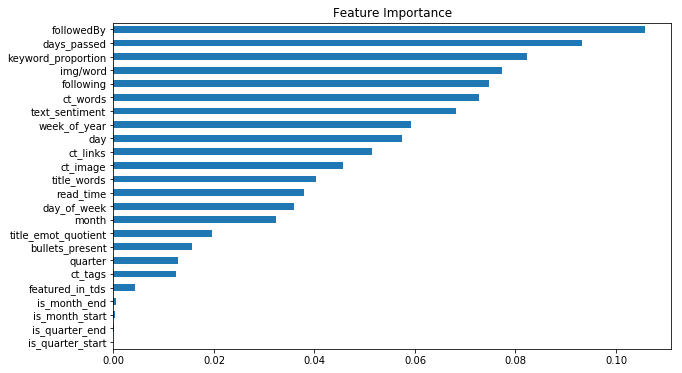

In [471]:
fi.sort_values(by = 'Importance', ascending=True).plot.barh(figsize = (10,6), legend = False, title = 'Feature Importance')

In [480]:
'''
A function that attempts to generate a standard waterfall chart in generic Python. Requires two sequences,
one of labels and one of values, ordered accordingly.
'''


from matplotlib.ticker import FuncFormatter
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.lines as lines

#------------------------------------------

def plot(index, data, Title="", x_lab="", y_lab="",
              formatting = "{:,.5f}", green_color='#29EA38', red_color='#FB3C62', blue_color='#24CAFF',
             sorted_value = False, threshold=None, other_label='other', net_label='net', 
             rotation_value = 30):
    '''
    Given two sequences ordered appropriately, generate a standard waterfall chart.
    Optionally modify the title, axis labels, number formatting, bar colors, 
    increment sorting, and thresholding. Thresholding groups lower magnitude changes
    into a combined group to display as a single entity on the chart.
    '''
    
    #convert data and index to np.array
    index=np.array(index)
    data=np.array(data)
    
    # wip
    #sorted by absolute value 
    if sorted_value: 
        abs_data = abs(data)
        data_order = np.argsort(abs_data)[::-1]
        data = data[data_order]
        index = index[data_order]
    
    #group contributors less than the threshold into 'other' 
    if threshold:
        
        abs_data = abs(data)
        threshold_v = abs_data.max()*threshold
        
        if threshold_v > abs_data.min():
            index = np.append(index[abs_data>=threshold_v],other_label)
            data = np.append(data[abs_data>=threshold_v],sum(data[abs_data<threshold_v]))
    
    changes = {'amount' : data}
    
    #define format formatter
    def money(x, pos):
        'The two args are the value and tick position'
        return formatting.format(x)
    formatter = FuncFormatter(money)
    
    fig, ax = plt.subplots()
    ax.yaxis.set_major_formatter(formatter)

    #Store data and create a blank series to use for the waterfall
    trans = pd.DataFrame(data=changes,index=index)
    blank = trans.amount.cumsum().shift(1).fillna(0)
    
    trans['positive'] = trans['amount'] > 0

    #Get the net total number for the final element in the waterfall
    total = trans.sum().amount
    trans.loc[net_label]= total
    blank.loc[net_label] = total

    #The steps graphically show the levels as well as used for label placement
    step = blank.reset_index(drop=True).repeat(3).shift(-1)
    step[1::3] = np.nan

    #When plotting the last element, we want to show the full bar,
    #Set the blank to 0
    blank.loc[net_label] = 0
    
    #define bar colors for net bar
    trans.loc[trans['positive'] > 1, 'positive'] = 99
    trans.loc[trans['positive'] < 0, 'positive'] = 99
    trans.loc[(trans['positive'] > 0) & (trans['positive'] < 1), 'positive'] = 99
    
    trans['color'] = trans['positive']
    
    trans.loc[trans['positive'] == 1, 'color'] = green_color
    trans.loc[trans['positive'] == 0, 'color'] = red_color
    trans.loc[trans['positive'] == 99, 'color'] = blue_color
    
    my_colors = list(trans.color)
    
    #Plot and label
    plt.figure(figsize=(20,15))
    my_plot = plt.bar(range(0,len(trans.index)), blank, width=0.5, color='white')
    plt.bar(range(0,len(trans.index)), trans.amount, width=0.6,
             bottom=blank, color=my_colors)       
                                   
    
    # connecting lines - figure out later
    #my_plot = lines.Line2D(step.index, step.values, color = "gray")
    #my_plot = lines.Line2D((3,3), (4,4))
    
    #axis labels
    plt.xlabel("\n" + x_lab)
    plt.ylabel(y_lab + "\n")

    #Get the y-axis position for the labels
    y_height = trans.amount.cumsum().shift(1).fillna(0)
    
    temp = list(trans.amount)
    
    # create dynamic chart range
    for i in range(len(temp)):
        if (i > 0) & (i < (len(temp) - 1)):
            temp[i] = temp[i] + temp[i-1]
    
    trans['temp'] = temp
            
    plot_max = trans['temp'].max()
    plot_min = trans['temp'].min()
    
    #Make sure the plot doesn't accidentally focus only on the changes in the data
    if all(i >= 0 for i in temp):
        plot_min = 0
    if all(i < 0 for i in temp):
        plot_max = 0
    
    if abs(plot_max) >= abs(plot_min):
        maxmax = abs(plot_max)   
    else:
        maxmax = abs(plot_min)
        
    pos_offset = maxmax / 40
    
    plot_offset = maxmax / 15 ## needs to me cumulative sum dynamic

    #Start label loop
    loop = 0
    for index, row in trans.iterrows():
        # For the last item in the list, we don't want to double count
        if row['amount'] == total:
            y = y_height[loop]
        else:
            y = y_height[loop] + row['amount']
        # Determine if we want a neg or pos offset
        if row['amount'] > 0:
            y += (pos_offset*2)
            plt.annotate(formatting.format(row['amount']),(loop,y),ha="center", color = 'g', fontsize=9)
        else:
            y -= (pos_offset*4)
            plt.annotate(formatting.format(row['amount']),(loop,y),ha="center", color = 'r', fontsize=9)
        loop+=1

    #Scale up the y axis so there is room for the labels
    plt.ylim(plot_min-round(3.6*plot_offset, 7),plot_max+round(3.6*plot_offset, 7))
    
    #Rotate the labels
    plt.xticks(range(0,len(trans)), trans.index, rotation=rotation_value)
    
    #add zero line and title
    plt.axhline(0, color='black', linewidth = 0.6, linestyle="dashed")
    plt.title(Title)
    plt.tight_layout()

    return plt

In [482]:
#from waterfallcharts import quick_charts as qc
# a = np.array(features)
# b = np.array(conts).reshape(24)
# plot = plot(a,b, Title= 'Blog 3087', y_lab= 'Probability', x_lab= 'Contributing features (path)',
#  net_label = 'Final Prediction')
# plot.show()

In [484]:
# from treeinterpreter import treeinterpreter as ti
# def imp_ti(m,x):
#     imp = []
#     for i in range(x.shape[0]):
#         prediction, bias, contributions = ti.predict(m, x.values[None,i])
#         imp.append(contributions)
#     return np.sum(np.abs(imp), axis=0)

In [300]:
sum(abs(np.subtract(y_val, val_pred)))/len(y_val)

5.163915094339623

In [305]:
data[data.title == 'Collaborative Filtering and Embeddings']

,title_words,days_passed,ct_image,ct_tags,text,ct_words,title_emot_quotient,featured_in_tds,read_time,links,...,day_of_week,month,is_month_end,is_quarter_end,is_month_start,is_quarter_start,week_of_year,quarter,bullets_present,ct_links


In [510]:
new_df = pd.DataFrame(X.loc[[515, 4232]], columns=X_train.columns)

In [511]:
new_df[features[0:12]]

,title_words,days_passed,ct_image,ct_tags,ct_words,title_emot_quotient,featured_in_tds,read_time,img/word,text_sentiment,keyword_proportion,day
515,5.0,78.0,9.0,3.0,1275.0,0.0000,False,8.0,0.007059,0.9973,0.378824,25
4232,7.0,57.0,1.0,5.0,1563.0,0.4019,False,7.0,0.000640,0.9992,0.358925,16


In [512]:
new_df[features[12:24]]

,day_of_week,month,bullets_present,followedBy,following,ct_links,is_month_end,is_quarter_end,is_month_start,is_quarter_start,week_of_year,quarter
515,5,11,0,917.0,54.0,8,False,False,False,False,47,4
4232,5,12,0,72.0,23.0,14,False,False,False,False,50,4


In [515]:
X_sample = X.loc[4232]
y_sample = y.loc[4232]
X_sample, y_sample

(title_words                      7
 days_passed                     57
 ct_image                         1
 ct_tags                          5
 ct_words                      1563
 title_emot_quotient         0.4019
 featured_in_tds              False
 read_time                        7
 img/word               0.000639795
 text_sentiment              0.9992
 keyword_proportion        0.358925
 day                             16
 day_of_week                      5
 month                           12
 bullets_present                  0
 followedBy                      72
 following                       23
 ct_links                        14
 is_month_end                 False
 is_quarter_end               False
 is_month_start               False
 is_quarter_start             False
 week_of_year                    50
 quarter                          4
 Name: 4232, dtype: object, 19)

In [523]:
X_sample = pd.DataFrame(X.loc[4232].values[None,:], columns=X.columns)
print('Predicted bin = ' + str(rf.predict(X_sample)))

Predicted bin = [14]


In [517]:
bin_data

,bucket,start,end
0,0,1.000000,11.000000
1,1,11.000000,22.000000
2,2,22.000000,34.000000
3,3,34.000000,51.000000
4,4,51.000000,66.000000
5,5,66.000000,81.000000
6,6,81.000000,101.000000
7,7,101.000000,126.000000
8,8,126.000000,154.100006
9,9,154.100006,187.000000


In [432]:
print('Predicted bin = ' + str(rf.predict(new_df)[0]))

Predicted bin = 17


In [499]:
y.loc[931], y.loc[1582]

(17, 18)

In [533]:
# X_sample.values[:,None]

In [524]:
data['claps'].describe()

count    4239.000000
mean      362.637650
std       438.903736
min         1.000000
25%        66.000000
50%       187.000000
75%       491.000000
max      2000.000000
Name: claps, dtype: float64

In [ ]:
from sklearn.metrics import logloss
loss = log_loss(y_val, val_pred, rf.classes_)
mae = sum(abs(np.subtract(y_val, val_pred)))/len(y_val)